In [1]:
import tensorflow as tf
tf.__version__ # 2.2.0

'2.2.0'

170500096/170498071 [==============================] - 8s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_______________________________________________________

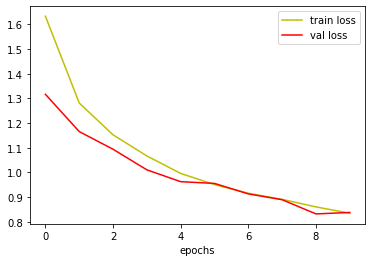

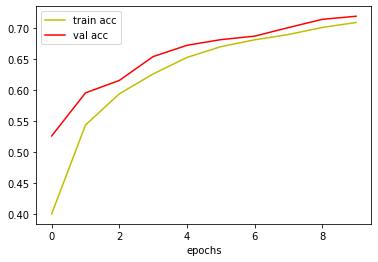

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.92      0.85      0.88        13
           2       0.70      0.88      0.78         8
           3       0.70      0.64      0.67        11
           4       1.00      0.50      0.67        14
           5       0.83      0.91      0.87        11
           6       0.90      0.90      0.90        10
           7       0.56      0.71      0.63         7
           8       0.75      1.00      0.86        12
           9       0.62      0.62      0.62         8

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.77       100
weighted avg       0.80      0.78      0.78       100

fail : real(truck) -> pred(cat)
fail : real(automobile) -> pred(truck)
success : cat
success : horse
success : ship
success : frog
success : frog
success : truck
success : cat
success : ship
success : ship
success : dog
success : horse
succe

In [1]:
import tensorflow as tf # ver2.x
from tensorflow.keras.datasets.cifar10 import load_data # dataset
from tensorflow.keras import Sequential # model
from tensorflow.keras.utils import to_categorical # one-hot encoding 
from tensorflow.keras.layers import Conv2D, MaxPooling2D # Conv layer
from tensorflow.keras.layers import Dense, Flatten, Dropout # DNN layer
import time

start_time = time.time()


# 1. dataset load
(x_train, y_train), (x_val, y_val) = load_data()

x_train.shape # images : (50000, 32, 32, 3) - (size, h, w, c)
y_train.shape # labels : (50000, 1)

# image 전처리 : 실수형 -> 정규화 
x_train[0] # 0~255 : 정수형 

x_train = x_train.astype("float32")
x_val = x_val.astype("float32")

# 정규화 
x_train = x_train / 255
x_val = x_val / 255
x_train[0] # 전처리 확인 

# label 전처리 : one-hot
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_train

# 2. keras CNN model layer
model = Sequential()

input_shape = (32, 32, 3)

# conv layer1 : 1층 [5,5,3,32] : kernel_size -> Filter
model.add(Conv2D(32, kernel_size=(5,5), input_shape = input_shape,
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.2))

# conv layer2 : 2층 [5,5,32,64]
model.add(Conv2D(64, kernel_size=(5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.2))

# Flatten : 3d -> 1d
model.add(Flatten())

# DNN hidden layer : 3층 
model.add(Dense(64, activation="relu"))

# DNN output layer : 4층 
model.add(Dense(10, activation="softmax"))


# 3. model compile : 학습환경 설정 
model.compile(optimizer = 'adam',  # 최적화 알고리즘(lr 생략) 
              loss='categorical_crossentropy', # 손실 
              metrics=['accuracy']) # 평가 방법 

# layer 확인 
model.summary() 


# 4. model training 
model_fit = model.fit(x=x_train, y=y_train, # 학습용 
          batch_size = 100, # 1회 공급 data size 
          epochs=10, # image 재학습 size 
          verbose=1,
          validation_data=(x_val, y_val)) # 평가용 


# 5. model evaluation : 모델 검증  
loss, acc = model.evaluate(x=x_val, y=y_val) # accuracy: 0.9763
print("loss ={:.7f}, accuracy = {:.7f}".format(loss, acc))
# loss =0.9008456, accuracy = 0.6857000


# 6. model history 
print(model_fit.history.keys())
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

train_loss = model_fit.history['loss']
train_acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss']
val_acc = model_fit.history['val_accuracy']

import matplotlib.pyplot as plt 

# train vs val loss
plt.plot(train_loss, color = 'y', label = 'train loss')
plt.plot(val_loss, color='r', label = 'val loss')
plt.legend(loc='best')
plt.xlabel("epochs")
plt.show()

# train vs val accuracy
plt.plot(train_acc, color = 'y', label = 'train acc')
plt.plot(val_acc, color='r', label = 'val acc')
plt.legend(loc='best')
plt.xlabel("epochs")
plt.show()

# 7. model test(new dataset)
from sklearn.metrics import classification_report # f1 score 
import numpy as np 

labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


idx = np.random.choice(a=x_val.shape[0], size=100, replace=False)
x_test = x_val[idx] # new dataset images 
y_test = y_val[idx] # new dataset labels

y_pred = model.predict(x_test) # 예측치 : 확률 
y_true = y_test # 정답 : one-hot 

# integer 변환 
y_pred = np.argmax(y_pred, 1)
y_true = np.argmax(y_true, 1)

report = classification_report(y_true, y_pred)
print(report)
'''
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         8
           3       0.67      0.18      0.29        11
           4       0.47      0.64      0.55        14
           5       0.71      0.45      0.56        11
           6       0.67      0.86      0.75         7
           7       0.76      0.93      0.84        14
           8       0.67      1.00      0.80        12
           9       0.75      1.00      0.86         6

    accuracy                           0.69       100
   macro avg       0.74      0.71      0.69       100
weighted avg       0.71      0.69      0.67       100
'''

# 성공여부 
for i in range(100) :
    if y_true[i] == y_pred[i] :
        print("success :", labels[y_true[i]])
    else :
        print("fail : real({}) -> pred({})".format(labels[y_true[i]],
                                                   labels[y_pred[i]]))


end_time = time.time() - start_time
print("소요시간 :", end_time)

